# 1. Datenimport, -darstellung und -visualisierung

## 1.1 Import der Funktionsbibliotheken

In [26]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns



## 1.2 Import der CSV-Datei

In [27]:
# Dateiname soll angepasst werden
# Parameter zum Auslesen der CSV sollen bei Bedarf angepasst werden (s. zwei Bespielparameter)

In [28]:
# Date;z2_AC1(kW);z2_Light(kW);z2_Plug(kW)
# KM: z2_AC1(kW)
# T : z2_Light(kW)
# F : z2_Plug(kW)
# E : spezische Enthalpie der Außenluft (kJ/kg)
# G : Globalstrahlung (W/m²)

In [29]:
file = "data1.csv"

# Auslesen der CSV-Datei + Erstellung Dataframe (df)

#df = pd.read_csv(file, parse_dates=['date'], decimal=',')
df = pd.read_csv(file, parse_dates=['date'], decimal='.', sep=';')

# Kleinbuchstaben für Spaltennamen (optional)
df.columns = [x.lower() for x in df.columns]

# Setze Spalte 'date' als "Datetime-Index" für Dataframe
df = df.set_index('date')

## 1.3 Ausdruck vom Datensatz

In [30]:
print(df)

                        km      t      f
date                                    
2019-01-01 00:03:00  51.32  17.39  18.85
2019-01-01 00:04:00  48.87  17.48  18.57
2019-01-01 00:05:00  40.85  17.54  18.16
2019-01-01 00:13:00  49.21  17.68  15.67
2019-01-01 00:14:00  38.81  17.78  17.41
2019-01-01 00:29:00  51.94  17.59  17.13
2019-01-01 00:31:00  21.93  17.57  16.58
2019-01-01 00:37:00  49.74  17.57  14.94
2019-01-01 00:38:00  49.06  17.56  15.73
2019-01-01 00:39:00  37.03  17.54  17.28
2019-01-01 00:54:00  50.82  17.52  17.35
2019-01-01 00:55:00  49.25  17.56  17.31
2019-01-01 00:56:00  13.91  17.61  16.76
2019-01-01 01:03:00  49.14  17.57  15.34
2019-01-01 01:04:00  49.19  17.62  16.47
2019-01-01 01:15:00  49.36  17.84  15.95
2019-01-01 01:16:00  49.31  17.93  16.68
2019-01-01 01:27:00  48.98  17.92  13.69
2019-01-01 01:28:00  49.30  18.00  17.51
2019-01-01 01:44:00  51.88  17.55  19.13
2019-01-01 01:45:00  49.76  17.48  18.46
2019-01-01 01:51:00  37.80  17.43  18.46
2019-01-01 01:52

## 1.4  Statistische Kennwerte des Datensatzes

In [31]:
df.describe()
#count= Anzahl der Werte
#mean= Durchschnitt der Werte
#std= Standardabweichung der Werte
#min= minimaler Wert
#25%= 25%-Quantil (25 % aller Werte liegen unterhalb dieses Wertes)
#50%= 50%-Quantil (50 % aller Werte liegen unterhalb dieses Wertes)
#75%= 75%-Quantil (75 % aller Werte liegen unterhalb dieses Wertes)
#max= maximaler Wert

,km,t,f
count,21457.000000,21457.000000,21457.000000
mean,33.353467,14.265213,16.551809
std,21.690351,3.816126,2.350552
min,0.000000,0.540000,5.000000
25%,0.030000,13.560000,14.780000
50%,46.310000,14.470000,16.330000
75%,48.360000,15.820000,18.260000
max,59.810000,37.180000,46.630000


## 1.5 Visualisierung des Ausgabewerts

Text(0, 0.5, 'Stromverbrauch Kältemaschinen [kWh]')

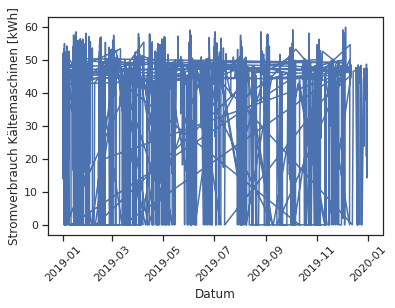

In [32]:
#Anpassung der Diagramgröße (optional)

#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
#plt.figure(figsize=(10,6))

plt.plot(df.km)

plt.xticks( rotation='45')
plt.xlabel('Datum')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')

# 2. Datenvorverarbeitung

## 2.1 Ausreißererkennung und -entfernung

### 2.1.1 Detektion von Ausreißern

In [33]:
# Sortiere Ausgabewert nach Größe (absteigend)
sorted_km_up = df.sort_values('km',ascending=False)
upper_treshold=sorted_km_up.km[len(sorted_km_up.head(len(sorted_km_up)//1000))]
# Sortiere Ausgabewert nach Größe (aufsteigend)
sorted_km_down = df.sort_values('km',ascending=True)
lower_treshold=sorted_km_down.km[len(sorted_km_down.head(len(sorted_km_down)//1000))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


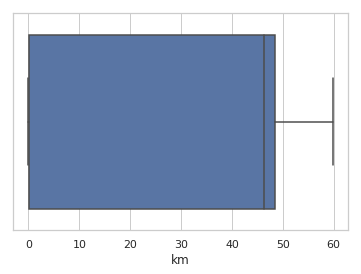

In [34]:
# Boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(df.km)

In [35]:
print("Das 99,9%-Perzentil des Ausgabewerts beträgt",
      upper_treshold,"kWh,",len(sorted_km_up.head(len(sorted_km_up)//1000)),"Werte liegen oberhalb diesen Wertes.")

Das 99,9%-Perzentil des Ausgabewerts beträgt 57.74 kWh, 21 Werte liegen oberhalb diesen Wertes.


In [36]:
print("Das 0,01%-Perzentil des Ausgabewerts beträgt",
      lower_treshold,"kWh,",len(sorted_km_down.head(len(sorted_km_down)//1000)),"Werte liegen unterhalb diesen Wertes.")

Das 0,01%-Perzentil des Ausgabewerts beträgt 0.02 kWh, 21 Werte liegen unterhalb diesen Wertes.


### 2.1.2 Entfernung der Ausreißer

In [37]:
# Entferne Werte aus dem Datensatz ober und unterhalb der festgelegten Grenze
df = df.dropna()
df = df.drop(df[(df.km>upper_treshold)|(df.km<lower_treshold)].index)

### 2.1.3 Visualisierung des bereinigten Ausgabewerts

Text(0, 0.5, 'Stromverbrauch Kältemaschinen [kWh]')

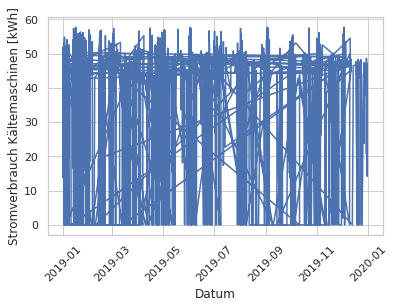

In [38]:
#Anpassung der Diagramgröße (optional)
#plt.figure(figsize=(16,6))

plt.plot(df.km)
plt.xticks( rotation='45')
plt.xlabel('Datum')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')

## 2.2 Merkmalsextraktion

In [39]:
# Hänge weitere Spalten an den Dataframe via Datetime-Index

df['month'] = df.index.month
df['week'] = df.index.week

df['weekday'] = df.index.weekday
df['hour'] = df.index.hour

print (df)

                        km      t      f  month  week  weekday  hour
date                                                                
2019-01-01 00:03:00  51.32  17.39  18.85      1     1        1     0
2019-01-01 00:04:00  48.87  17.48  18.57      1     1        1     0
2019-01-01 00:05:00  40.85  17.54  18.16      1     1        1     0
2019-01-01 00:13:00  49.21  17.68  15.67      1     1        1     0
2019-01-01 00:14:00  38.81  17.78  17.41      1     1        1     0
2019-01-01 00:29:00  51.94  17.59  17.13      1     1        1     0
2019-01-01 00:31:00  21.93  17.57  16.58      1     1        1     0
2019-01-01 00:37:00  49.74  17.57  14.94      1     1        1     0
2019-01-01 00:38:00  49.06  17.56  15.73      1     1        1     0
2019-01-01 00:39:00  37.03  17.54  17.28      1     1        1     0
2019-01-01 00:54:00  50.82  17.52  17.35      1     1        1     0
2019-01-01 00:55:00  49.25  17.56  17.31      1     1        1     0
2019-01-01 00:56:00  13.91  17.61 

## 2.3 Datenaggregation und -visualisierung

In [40]:
# Durchschnittswert je Tagesstunde
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()

# Durchschnittswert je Wochentag
def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
    
# Durchschnittswert je Wochentag und Monat
#def monthly_daily(x,df=df):
#    by_day = df.pivot_table(index='weekday', 
#                                columns=['month'],
#                                values=x,
#                                aggfunc='mean')
#    return round(by_day, ndigits=1)
#
# Durchschnittswert je Wochentag und Monat
#def daily_hourly(x,df=df):
#    by_day_hour = df.pivot_table(index='weekday', 
#                                columns=['hour'],
#                                values=x,
#                                aggfunc='mean')
#   return round(by_day_hour, ndigits=0)


# Durchschnittswert je Wochentag und Tagesstunde
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

df['weekday_avg'] = list(map(code_mean(df[:], 'weekday', "km").get, df.weekday))
df['hour_avg'] = list(map(code_mean(df[:], 'hour', "km").get, df.hour))
#df.describe()

### 2.3.1 Mittelwert je Wochentag

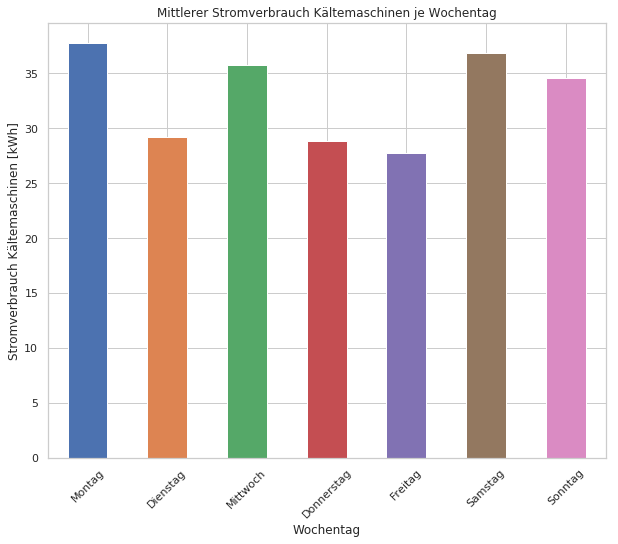

In [41]:
# Diagramm: Mittlerer Stromverbrauch Kältemaschinen je Wochentag

ticks = list(range(0, 7, 1)) 

daily('km').plot(kind = 'bar', figsize=(10,8))

labels = "Montag Dienstag Mittwoch Donnerstag Freitag Samstag Sonntag".split()
plt.xlabel('Wochentag')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')
plt.title('Mittlerer Stromverbrauch Kältemaschinen je Wochentag')
plt.xticks(ticks, labels,rotation='45')

### 2.3.3 Mittelwert je Wochentag und Tagesstunde

([<matplotlib.axis.XTick at 0xaa3ab230>,
 <a list of 24 Text xticklabel objects>)

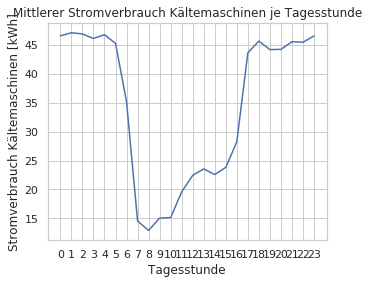

In [42]:
# Diagramm: Mittlerer Stromverbrauch Kältemaschinen je Tagesstunde

hourly('km').plot(figsize=(5,4))
plt.xlabel('Tagesstunde')
plt.ylabel('Stromverbrauch Kältemaschinen [kWh]')
ticks = list(range(0, 24, 1))
plt.title('Mittlerer Stromverbrauch Kältemaschinen je Tagesstunde')

plt.xticks(ticks)

### 2.3.4 Mittelwert je Wochentag und Stunde (Heatmap)

In [43]:
# Heatmap: Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Stunde
#sns.set(rc={'figure.figsize':(10,8)},)
#ax=sns.heatmap(daily_hourly('km').T,cmap="YlGnBu",
#               xticklabels="Mo Di Mi Do Fr Sa So".split(),
#               yticklabels=list(range(0, 24, 1)),
#               annot=True, fmt='g',
#               cbar_kws={'label': 'Stromverbrauch Kältemaschinen [kWh]'}).set_title("Mittlerer Stromverbrauch Kältemaschinen je Wochentag und Stunde").set_fontsize('15')
#b, t = plt.ylim()
#b += 0.5
#t -= 0.5
#plt.ylim(b, t)
#plt.show()


## 2.4 Log-Transformation und Histogramm

In [44]:
# Logarithmische Transformation der Werte
# Die Log-Transformation ordnet jedem ursprünglichen Wert als transformierten Wert
# den entsprechenden natürlichen Logarithmus dieses Werts zu.
#df['log_km'] = np.log(df.km)

In [45]:
#f, axes = plt.subplots(1, 2,figsize=(10,4))

# Histogramm Ausgabewert
#sns.distplot(df.km, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
#axes[0].set_title("km's consumption")
#axes[0].set_xlabel('km [kWh]')

# Histogramm des Log-transformierten Ausgabewerts
#sns.distplot(df.log_km, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
#axes[1].set_title("Log km's consumption")
#axes[1].set_xlabel('km_log [kWh]')

## 2.5 Visualisierung linearer Abhängigkeiten zwischen den Merkmalen

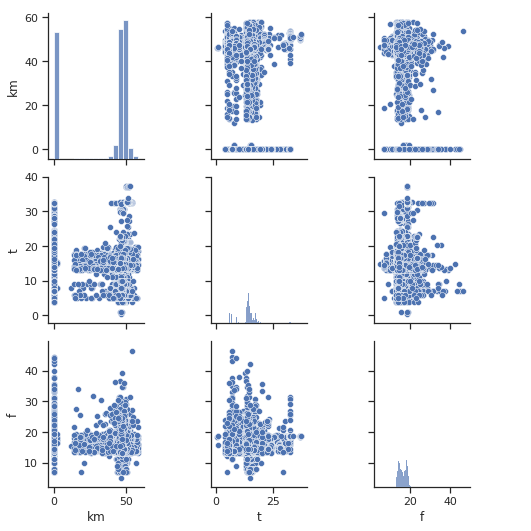

In [47]:
col = ['km', 't', 'f']
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[col])
plt.show()

# 3. Prognose-Modelle

## 3.1 Anlegen der Modelle und Zuordnung der Merkmale

In [50]:
# Lineares Regressions-Modell
model1 = ['hour','t','f']

# Support Vector Machines-Modell
#model2=['hour','t','f','e','g']

# Random Forest-Modell
model3 = ['hour','t','f']

# k-Nearest Neighbours-Modell
#model4=['hour','t','f','e','g']

## 3.2 Umwandlung der Zahlenformate

In [52]:
# Umandlung Zahlenformat
#df.log_km = df.log_km.astype(float)

df.km = df.km.astype(float)
df.hour = df.hour.astype(float)
df.t = df.t.astype(float)
df.f = df.f.astype(float)


## 3.3 Aufteilung in Test- und Trainingsdaten

In [55]:
# Erstelle Test- und Trainingsmodell

test_size=.3321 # 1/3 des gesamten Datensatzes für Testdaten, 2/3 des gesamten Datensatzes für Training
test_index = int(len(df.dropna())*(1-test_size))

# Lineares Regressions-Modell
X1_train, X1_test = df[model1].iloc[:test_index,], df[model1].iloc[test_index:,]
#y1_train = df.log_km.iloc[:test_index,]
y1_train = df.km.iloc[:test_index,]

# Support Vector Machines-Modell
#X2_train, X2_test = df[model2].iloc[:test_index,], df[model2].iloc[test_index:,]
#y2_train = df.log_km.iloc[:test_index,]
#y2_train = df.km.iloc[:test_index,]

# Random Forest-Modell
X3_train, X3_test = df[model3].iloc[:test_index,], df[model3].iloc[test_index:,]
#y3_train = df.log_km.iloc[:test_index,]
y3_train = df.km.iloc[:test_index,]

# k-Nearest Neighbours-Modell
#X4_train, X4_test = df[model4].iloc[:test_index,], df[model4].iloc[test_index:,]
#y4_train = df.log_km.iloc[:test_index,]
#y4_train = df.km.iloc[:test_index,]


#y_test =  df.log_km.iloc[test_index:,]
y_test =  df.km.iloc[test_index:,]

In [57]:
test_index

14308